In [1]:
#Importing libraries 

# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import psycopg2
from urllib.parse import quote  # Import for URL encoding



In [2]:
import psycopg2

# Establish connection to the PostgreSQL database
try:
    conn = psycopg2.connect(
        host='localhost',
        database='SQL_Challenge',
        user='postgres',
        password='@Jovanotti1990',
        port='5432'
    )
    print("Connection established successfully.")

except Exception as e:
    print(f"Error: {e}")

#finally:
    #if conn:
        #conn.close()

Connection established successfully.


In [11]:
#Convert the into DataFrame
titles = [('id', 'title')]
titles = pd.DataFrame(titles, columns = ['id', 'title'])
titles.head()

,id,title
0,id,title


In [ ]:
query = 'select * from salaries'
df_salaries = pd.read_sql_query(query, con=conn)
df_salaries.head(30)

C:\Users\A1990\AppData\Local\Temp\ipykernel_37768\4006033708.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_salaries = pd.read_sql_query(query, con=conn)


,emp_no,salary
0,10001,"$60,117.00"
1,10002,"$65,828.00"
2,10003,"$40,006.00"
3,10004,"$40,054.00"
4,10005,"$78,228.00"
5,10006,"$40,000.00"
6,10007,"$56,724.00"
7,10008,"$46,671.00"
8,10009,"$60,929.00"
9,10010,"$72,488.00"


In [ ]:
# Check data types and found that SQL "money" does not translate well into pandas
df_salaries.dtypes

emp_no     int64
salary    object
dtype: object

In [ ]:
# Convert data type for salary from Object to Float
df_salaries["salary"] = df_salaries["salary"].replace("\$|","", regex=True).replace(",","",regex=True).astype(float)

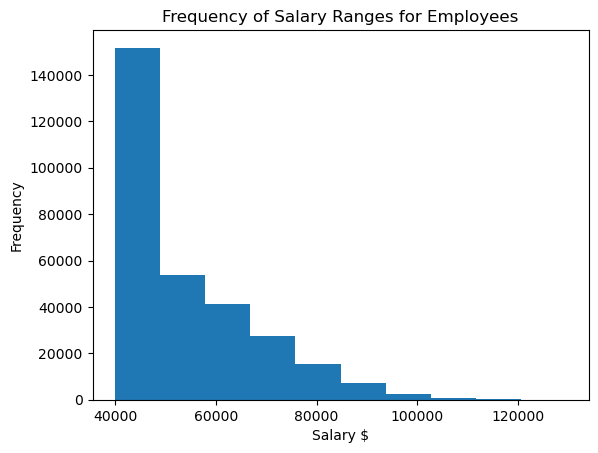

In [ ]:
# Plot histogram 
histogram = df_salaries["salary"]
chart1 = histogram.plot.hist()
chart1.set_title("Frequency of Salary Ranges for Employees")
chart1.set_xlabel("Salary $")
plt.show()

In [ ]:
# Reading the "employees" table into pandas
employees = pd.read_sql("SELECT * FROM \"employees\"", conn)
employees.head(20)

C:\Users\A1990\AppData\Local\Temp\ipykernel_37768\2943219447.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employees = pd.read_sql("SELECT * FROM \"employees\"", conn)


,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18
5,263976,e0003,1959-10-30,Eran,Cusworth,M,1986-11-14
6,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28
7,461591,s0002,1964-11-17,Xudong,Samarati,M,1985-11-13
8,477657,e0002,1962-12-18,Lihong,Magliocco,M,1993-10-23
9,219881,s0002,1956-04-24,Kwangyoen,Speek,F,1993-02-14


In [ ]:
# Reading the titles table into pandas
titles = pd.read_sql("SELECT * FROM \"titles\"", conn)
titles.head(7)

C:\Users\A1990\AppData\Local\Temp\ipykernel_37768\3309876928.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  titles = pd.read_sql("SELECT * FROM \"titles\"", conn)


,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


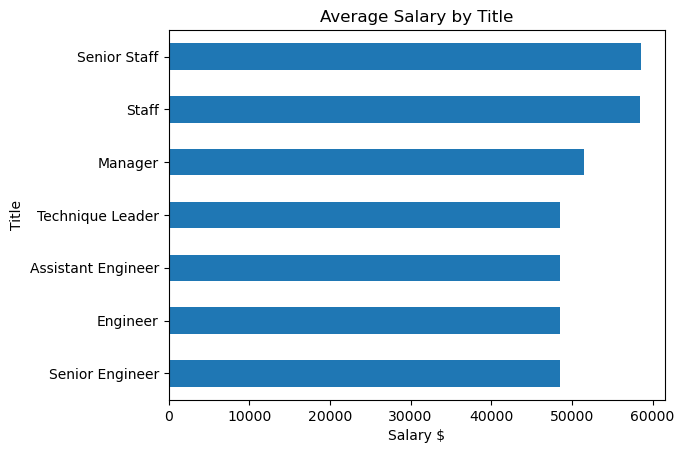

In [ ]:
# Merge tables:salaries, employees and title to get salary by title
emp_w_salary = employees.merge(df_salaries, on="emp_no")
merged = emp_w_salary.merge(titles, left_on="emp_title_id", right_on="title_id")

# Plot bar chart to show average salary by title
bar = merged[["title","salary"]].groupby("title").mean()
bar = bar.sort_values(by="salary", ascending=True)
chart2 = bar.plot.barh(legend=False)
chart2.set_title("Average Salary by Title")
chart2.set_xlabel("Salary $")
chart2.set_ylabel("Title")
plt.show()

In [ ]:
merged[merged["emp_no"]==499942]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,salary,title_id,title
287532,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,40000.0,e0004,Technique Leader


In [ ]:
conn.close()